In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report,roc_curve, roc_auc_score, confusion_matrix

In [212]:
bank_train_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_data_science/refs/heads/main/train.csv')
bank_train_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [213]:
bank_test_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_data_science/refs/heads/main/test.csv')
bank_test_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [214]:
bank_train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [215]:
# Renaming Columns for better readability
bank_column_name = {
    'default': 'credit_default', 
    'balance': 'yearly_balance', 
    'housing': 'housing_loan',
    'loan': 'personal_loan', 
    'contact': 'communication_type', 
    'day': 'last_day', 
    'month': 'last_month', 
    'duration': 'last_duration', 
    'campaign': 'campaign_num_contacts', 
    'pdays': 'num_days_passed',
    'previous': 'prev_campaign_contacts', 
    'poutcome': 'prev_campaign_outcome', 
    'y': 'subscription_term_deposit'
}

bank_train_df = bank_train_df.rename(columns = bank_column_name)
bank_test_df = bank_test_df.rename(columns = bank_column_name)

In [216]:
bank_train_df.head(5)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [217]:
bank_test_df.head(5)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [218]:
bank_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   credit_default             45211 non-null  object
 5   yearly_balance             45211 non-null  int64 
 6   housing_loan               45211 non-null  object
 7   personal_loan              45211 non-null  object
 8   communication_type         45211 non-null  object
 9   last_day                   45211 non-null  int64 
 10  last_month                 45211 non-null  object
 11  last_duration              45211 non-null  int64 
 12  campaign_num_contacts      45211 non-null  int64 
 13  num_days_passed            45211 non-null  int64 
 14  prev_c

In [219]:
# Describing the dataset for Numerical columns
bank_train_df.describe()

,age,yearly_balance,last_day,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [220]:
#  Non of the columns in the Dataset have NaN values and this we do not have to impute any values in the dataset
bank_train_df.isna().sum()

age                          0
job                          0
marital                      0
education                    0
credit_default               0
yearly_balance               0
housing_loan                 0
personal_loan                0
communication_type           0
last_day                     0
last_month                   0
last_duration                0
campaign_num_contacts        0
num_days_passed              0
prev_campaign_contacts       0
prev_campaign_outcome        0
subscription_term_deposit    0
dtype: int64

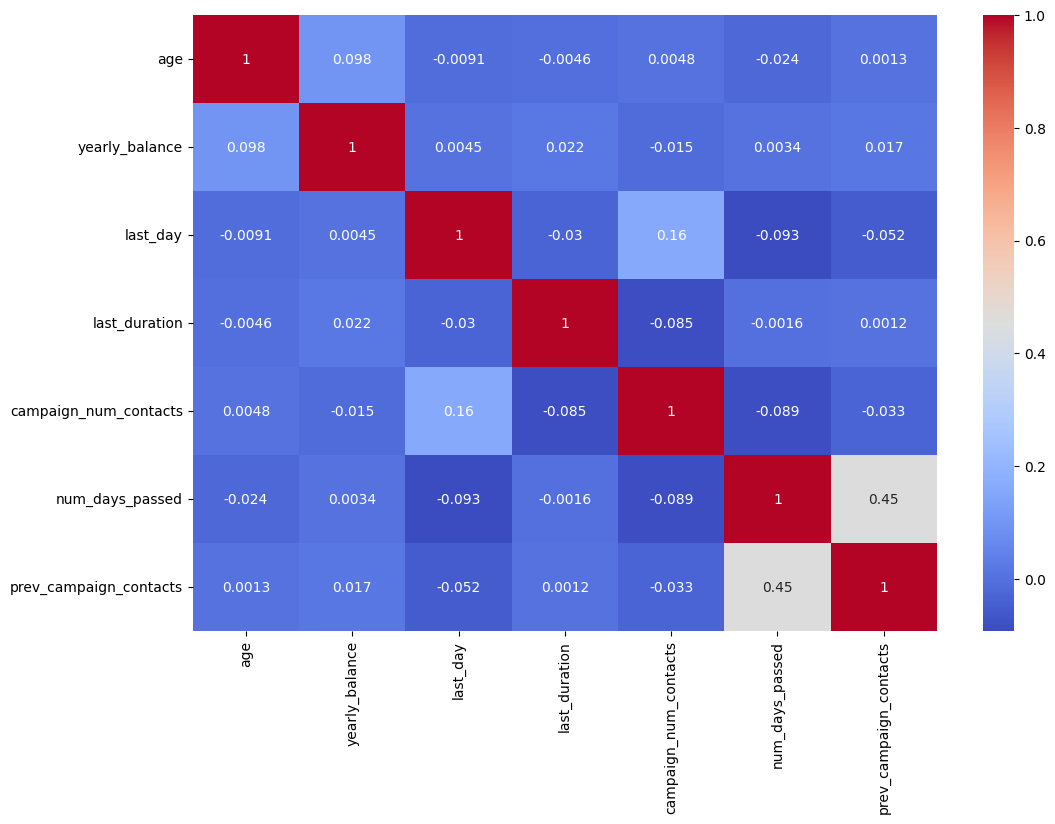

In [221]:
# Numerical Columns: age, yearly_balance, last_day, last_duration, campaign_num_contacts, num_days_passed, prev_campaign_contacts

corr = bank_train_df[['age', 'yearly_balance', 'last_day', 'last_duration', 'campaign_num_contacts', 'num_days_passed', 'prev_campaign_contacts']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [222]:
bank_train_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     39922
yes     5289
Name: count, dtype: int64

In [223]:
bank_test_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     4000
yes     521
Name: count, dtype: int64

In [224]:
print(f'Job: {bank_train_df['job'].value_counts()}')

Job: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [225]:
print(f'Education: {bank_train_df['education'].value_counts()}')

Education: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [226]:
print(f'Marital: {bank_train_df['marital'].value_counts()}')

Marital: marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [227]:
print(f'Contact: {bank_train_df['communication_type'].value_counts()}')

Contact: communication_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


In [228]:
print(f'Outcome: {bank_train_df['prev_campaign_outcome'].value_counts()}')

Outcome: prev_campaign_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [229]:
# Can be converted into buckets for different time durations
bank_train_df['last_duration']

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: last_duration, Length: 45211, dtype: int64

In [230]:
bank_train_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit'],
      dtype='object')

In [231]:
bank_train_df[(bank_train_df['education'] == 'unknown') &
                             (bank_train_df['communication_type'] == 'unknown') &
                             (bank_train_df['prev_campaign_outcome'] == 'unknown')][['education', 'communication_type', 'prev_campaign_outcome', 'subscription_term_deposit']]

,education,communication_type,prev_campaign_outcome,subscription_term_deposit
3,unknown,unknown,unknown,no
4,unknown,unknown,unknown,no
13,unknown,unknown,unknown,no
16,unknown,unknown,unknown,no
42,unknown,unknown,unknown,no
...,...,...,...,...
43849,unknown,unknown,unknown,no
44001,unknown,unknown,unknown,no
44121,unknown,unknown,unknown,no
44590,unknown,unknown,unknown,no


In [232]:
bank_train_df[(bank_train_df['education'] == 'unknown') &
                             (bank_train_df['communication_type'] == 'unknown') &
                             (bank_train_df['prev_campaign_outcome'] == 'unknown')]['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     652
yes     20
Name: count, dtype: int64

In [233]:
bank_train_df[bank_train_df['job'] == 'unknown']['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     254
yes     34
Name: count, dtype: int64

In [234]:
bank_train_df[(bank_train_df['communication_type'] == 'unknown') &
                             (bank_train_df['prev_campaign_outcome'] == 'unknown')][['education', 'communication_type', 'prev_campaign_outcome', 'subscription_term_deposit']]

,education,communication_type,prev_campaign_outcome,subscription_term_deposit
0,tertiary,unknown,unknown,no
1,secondary,unknown,unknown,no
2,secondary,unknown,unknown,no
3,unknown,unknown,unknown,no
4,unknown,unknown,unknown,no
...,...,...,...,...
45027,secondary,unknown,unknown,no
45061,secondary,unknown,unknown,no
45062,primary,unknown,unknown,no
45122,tertiary,unknown,unknown,no


In [235]:
bank_train_df[(bank_train_df['communication_type'] == 'unknown') &
                             (bank_train_df['prev_campaign_outcome'] == 'unknown')]['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     12432
yes      518
Name: count, dtype: int64

In [236]:
bank_train_df['last_month'].value_counts()

last_month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [237]:
add_yes_df = bank_test_df[bank_test_df['subscription_term_deposit'] == 'yes']
add_yes_df.head(10)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
37,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown,yes
38,33,management,married,secondary,no,3935,yes,no,cellular,6,may,765,1,342,2,failure,yes
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
50,45,blue-collar,divorced,primary,no,844,no,no,unknown,5,jun,1018,3,-1,0,unknown,yes
53,34,technician,married,tertiary,no,1539,yes,no,cellular,15,jun,441,1,56,1,other,yes


In [238]:
add_yes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 13 to 4511
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        521 non-null    int64 
 1   job                        521 non-null    object
 2   marital                    521 non-null    object
 3   education                  521 non-null    object
 4   credit_default             521 non-null    object
 5   yearly_balance             521 non-null    int64 
 6   housing_loan               521 non-null    object
 7   personal_loan              521 non-null    object
 8   communication_type         521 non-null    object
 9   last_day                   521 non-null    int64 
 10  last_month                 521 non-null    object
 11  last_duration              521 non-null    int64 
 12  campaign_num_contacts      521 non-null    int64 
 13  num_days_passed            521 non-null    int64 
 14  prev_campaign

In [239]:
banking_df = pd.concat([bank_train_df, add_yes_df])
banking_df.head(10)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [240]:
banking_df = banking_df.sample(frac = 1)

In [241]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45732 entries, 38803 to 38451
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45732 non-null  int64 
 1   job                        45732 non-null  object
 2   marital                    45732 non-null  object
 3   education                  45732 non-null  object
 4   credit_default             45732 non-null  object
 5   yearly_balance             45732 non-null  int64 
 6   housing_loan               45732 non-null  object
 7   personal_loan              45732 non-null  object
 8   communication_type         45732 non-null  object
 9   last_day                   45732 non-null  int64 
 10  last_month                 45732 non-null  object
 11  last_duration              45732 non-null  int64 
 12  campaign_num_contacts      45732 non-null  int64 
 13  num_days_passed            45732 non-null  int64 
 14  prev_ca

In [242]:
banking_df.describe()

,age,yearly_balance,last_day,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts
count,45732.000000,45732.000000,45732.000000,45732.000000,45732.000000,45732.000000,45732.000000
mean,40.953927,1364.660872,15.804732,261.519068,2.758178,40.521845,0.586132
std,10.651609,3038.654090,8.321412,261.294401,3.088841,100.447981,2.301382
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,451.000000,16.000000,182.000000,2.000000,-1.000000,0.000000
75%,48.000000,1433.250000,21.000000,323.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [243]:
banking_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     39922
yes     5810
Name: count, dtype: int64

In [244]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit'],
      dtype='object')

In [245]:
banking_df[banking_df['subscription_term_deposit'] == 'no']['prev_campaign_outcome'].value_counts()

prev_campaign_outcome
unknown    33573
failure     4283
other       1533
success      533
Name: count, dtype: int64

In [246]:
banking_df[banking_df['subscription_term_deposit'] == 'yes']['prev_campaign_outcome'].value_counts()

prev_campaign_outcome
unknown    3723
success    1061
failure     681
other       345
Name: count, dtype: int64

In [247]:
banking_df[banking_df['prev_campaign_outcome'] == 'unknown']

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
25614,55,blue-collar,married,primary,no,4103,no,no,cellular,19,nov,291,1,-1,0,unknown,no
25474,45,management,married,tertiary,no,1416,yes,yes,cellular,19,nov,740,1,-1,0,unknown,no
6420,29,management,single,secondary,no,0,yes,yes,unknown,27,may,92,2,-1,0,unknown,no
29826,52,technician,divorced,secondary,no,643,yes,no,cellular,4,feb,270,1,-1,0,unknown,no
6319,60,technician,married,tertiary,no,1626,yes,yes,unknown,27,may,395,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23091,35,management,married,tertiary,no,71,no,yes,cellular,26,aug,78,4,-1,0,unknown,no
2130,41,self-employed,married,secondary,no,304,yes,no,unknown,12,may,1147,2,-1,0,unknown,no
1778,27,admin.,single,secondary,no,662,yes,no,unknown,9,may,544,1,-1,0,unknown,no
15929,27,blue-collar,married,primary,no,202,no,yes,cellular,22,jul,41,1,-1,0,unknown,no


In [248]:
banking_df[banking_df['prev_campaign_outcome'] != 'unknown']['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     6349
yes    2087
Name: count, dtype: int64

<Axes: xlabel='yearly_balance', ylabel='Count'>

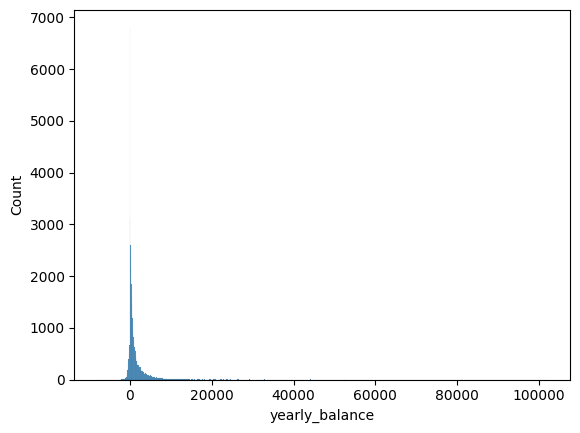

In [249]:
sns.histplot(banking_df['yearly_balance'])

In [250]:
banking_df['yearly_balance'].describe()

count     45732.000000
mean       1364.660872
std        3038.654090
min       -8019.000000
25%          73.000000
50%         451.000000
75%        1433.250000
max      102127.000000
Name: yearly_balance, dtype: float64

In [251]:
banking_df[banking_df['yearly_balance'] > 1872]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
25614,55,blue-collar,married,primary,no,4103,no,no,cellular,19,nov,291,1,-1,0,unknown,no
35671,56,technician,married,secondary,no,2313,yes,no,cellular,8,may,293,3,364,2,failure,no
26420,30,self-employed,married,secondary,no,2153,yes,no,cellular,20,nov,139,1,-1,0,unknown,no
3449,39,management,divorced,tertiary,no,9541,no,no,unknown,15,may,815,1,-1,0,unknown,no
36807,31,blue-collar,married,primary,no,2581,no,no,cellular,12,may,240,1,365,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42260,50,technician,divorced,unknown,no,2794,no,no,cellular,13,nov,350,5,93,2,success,no
23554,30,management,single,tertiary,no,20261,yes,no,cellular,28,aug,81,10,-1,0,unknown,no
39237,35,management,single,tertiary,no,9336,yes,no,cellular,18,may,311,2,-1,0,unknown,no
21601,32,technician,married,secondary,no,4133,no,no,cellular,19,aug,175,6,-1,0,unknown,no


In [252]:
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['yearly_balance'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 23.0
40% percentile: 273.0
60% percentile: 705.0
80% percentile: 1872.800000000003


In [253]:
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['age'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 32.0
40% percentile: 36.0
60% percentile: 42.0
80% percentile: 51.0


In [254]:
banking_df['age'].describe()

count    45732.000000
mean        40.953927
std         10.651609
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

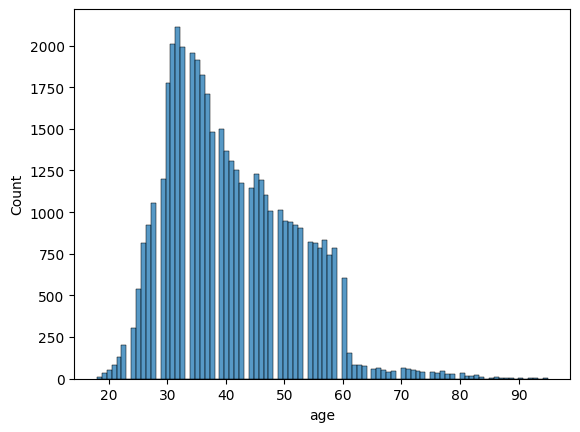

In [255]:
sns.histplot(banking_df['age'])

In [256]:
banking_df[(banking_df['education'] == 'unknown') &
                             (banking_df['communication_type'] == 'unknown') &
                             (banking_df['prev_campaign_outcome'] == 'unknown')][['education', 'communication_type', 'prev_campaign_outcome', 'subscription_term_deposit']]

,education,communication_type,prev_campaign_outcome,subscription_term_deposit
8930,unknown,unknown,unknown,no
11884,unknown,unknown,unknown,no
3353,unknown,unknown,unknown,no
11505,unknown,unknown,unknown,no
9093,unknown,unknown,unknown,no
...,...,...,...,...
2470,unknown,unknown,unknown,no
11812,unknown,unknown,unknown,no
3415,unknown,unknown,unknown,no
44,unknown,unknown,unknown,no


In [257]:
banking_df[(banking_df['education'] == 'unknown') &
                             (banking_df['communication_type'] == 'unknown') &
                             (banking_df['prev_campaign_outcome'] == 'unknown')]['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     652
yes     21
Name: count, dtype: int64

In [258]:
# Filtering the dataset to reduce common unknown values
banking_df = banking_df[~((banking_df['education'] == 'unknown') &
                             (banking_df['communication_type'] == 'unknown') &
                             (banking_df['prev_campaign_outcome'] == 'unknown'))]

In [259]:
# Filtering the dataset to reduce common unknown values
banking_df = banking_df[~(banking_df['job'] == 'unknown')]

In [260]:
banking_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     39069
yes     5749
Name: count, dtype: int64

In [261]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit'],
      dtype='object')

In [262]:
# Feature Engineering
# Mapping values for binary columns
banking_df['credit_default'] = banking_df['credit_default'].replace({'yes': 1, 'no': 0})
banking_df['housing_loan'] = banking_df['housing_loan'].replace({'yes': 1, 'no': 0})
banking_df['personal_loan'] = banking_df['personal_loan'].replace({'yes': 1, 'no': 0})
banking_df['subscription_term_deposit'] = banking_df['subscription_term_deposit'].replace({'yes': 1, 'no': 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\2736281157.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['credit_default'] = banking_df['credit_default'].replace({'yes': 1, 'no': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\2736281157.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['housing_loan'] = banking_df['housing_loan'].replace({'yes': 1, 'no': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\2736281157.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and

In [263]:
banking_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
0    39069
1     5749
Name: count, dtype: int64

In [264]:
# Creating bins for numerical columns
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['yearly_balance'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 23.0
40% percentile: 273.0
60% percentile: 703.0
80% percentile: 1866.0


In [265]:
# percentiles = [0.20, 0.40, 0.60, 0.80]
# labels = ['Very Low Income', 'Low Income', 'Median Income', 'High Income', 'Very High Income']

banking_df['Very Low Income'] = (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.2)).astype(int)
banking_df['Low Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.2)) & (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.4)).astype(int)
banking_df['Median Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.4)) & (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.6)).astype(int)
banking_df['High Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.6)) & (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.8)).astype(int)
banking_df['Very High Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.8)).astype(int)


In [266]:
# Creating bins for numerical columns
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['age'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 31.0
40% percentile: 36.0
60% percentile: 42.0
80% percentile: 51.0


In [267]:
banking_df['Low Age'] = (banking_df['age'] <= banking_df['age'].quantile(0.2)).astype(int)
banking_df['Low Median Age'] = (banking_df['age'] > banking_df['age'].quantile(0.2)) & (banking_df['age'] <= banking_df['age'].quantile(0.4)).astype(int)
banking_df['Median Age'] = (banking_df['age'] > banking_df['age'].quantile(0.4)) & (banking_df['age'] <= banking_df['age'].quantile(0.6)).astype(int)
banking_df['High Median Age'] = (banking_df['age'] > banking_df['age'].quantile(0.6)) & (banking_df['age'] <= banking_df['age'].quantile(0.8)).astype(int)
banking_df['High Age'] = (banking_df['age'] > banking_df['age'].quantile(0.8)).astype(int)

In [268]:
banking_df['last_day'].value_counts()

last_day
20    2679
18    2311
21    2028
17    1933
6     1864
5     1862
14    1849
8     1830
28    1812
7     1793
29    1719
19    1709
15    1699
12    1601
13    1579
30    1572
9     1538
11    1459
4     1433
16    1394
2     1292
27    1117
3     1067
26    1026
23     931
22     915
25     843
31     645
10     536
24     454
1      328
Name: count, dtype: int64

In [269]:
# Get value counts
bins = [1, 7, 13, 19, 25, 30, 32]
labels = ['1-6', '7-12', '13-18', '19-24', '25-29', '30-31']

# Assign buckets to a new column
banking_df['last_day_bucket'] = pd.cut(banking_df['last_day'], bins=bins, labels=labels, right=False)

In [270]:
banking_df['last_day_bucket'].value_counts()

last_day_bucket
13-18    10765
7-12      8757
19-24     8716
1-6       7846
25-29     6517
30-31     2217
Name: count, dtype: int64

In [271]:
banking_df[banking_df['last_day'] < 7]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Low Income,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket
29826,52,technician,divorced,secondary,0,643,1,0,cellular,4,...,False,True,False,0,0,False,False,False,1,1-6
34996,26,blue-collar,single,secondary,0,191,1,0,cellular,6,...,True,False,False,0,1,False,False,False,0,1-6
40443,56,retired,married,secondary,0,1044,0,0,telephone,3,...,False,False,True,0,0,False,False,False,1,1-6
34798,34,blue-collar,married,unknown,0,41,1,0,cellular,6,...,True,False,False,0,0,True,False,False,0,1-6
29559,32,management,single,secondary,0,-515,1,1,cellular,3,...,False,False,False,0,0,True,False,False,0,1-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29564,46,management,married,tertiary,0,-319,1,0,cellular,3,...,False,False,False,0,0,False,False,True,0,1-6
28912,36,admin.,single,secondary,0,115,0,0,cellular,2,...,True,False,False,0,0,True,False,False,0,1-6
12542,57,retired,married,secondary,0,91,0,1,unknown,3,...,True,False,False,0,0,False,False,False,1,1-6
9386,27,admin.,single,secondary,0,685,1,0,unknown,6,...,False,True,False,0,1,False,False,False,0,1-6


In [272]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket'],
      dtype='object')

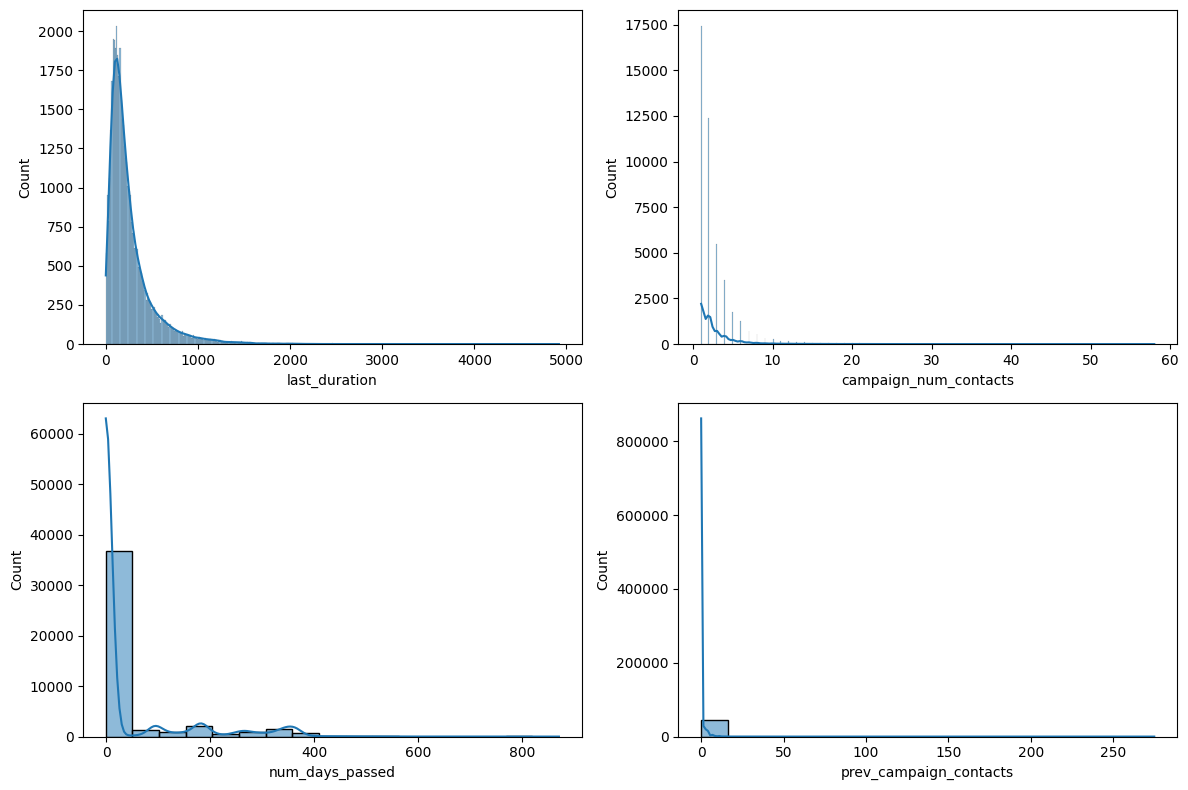

In [273]:
# Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.histplot(data=banking_df, x='last_duration', kde=True, ax=axes[0, 0])
sns.histplot(data=banking_df, x='campaign_num_contacts', kde=True, ax=axes[0, 1])
sns.histplot(data=banking_df, x='num_days_passed', kde=True, ax=axes[1, 0])
sns.histplot(data=banking_df, x='prev_campaign_contacts', kde=True, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [274]:
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['last_duration'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 90.0
40% percentile: 148.0
60% percentile: 225.0
80% percentile: 374.0


In [275]:
# Dividing the 4 data columns based on quantile ranges of every 20% to tackle right-skewed distribution
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Low', 'Low-Median', 'Median', 'High-Median', 'High']

# Creating new buckets based on quantiles for the last duration column
banking_df['last_duration_bucket'] = pd.qcut(banking_df['last_duration'], q=quantiles, labels=labels)

banking_df['last_duration_bucket'].value_counts()

last_duration_bucket
Low            9062
Median         8965
High-Median    8964
High           8939
Low-Median     8888
Name: count, dtype: int64

In [276]:
print(banking_df['prev_campaign_contacts'].value_counts())

prev_campaign_contacts
0      36414
1       2813
2       2144
3       1160
4        736
5        469
6        283
7        206
8        132
9         95
10        69
11        65
12        45
13        38
14        21
15        20
17        15
16        13
19        11
23         8
20         8
22         6
18         6
27         5
24         5
21         4
25         4
29         4
30         3
26         2
37         2
38         2
28         2
275        1
41         1
58         1
35         1
55         1
40         1
51         1
32         1
Name: count, dtype: int64


In [277]:
print(banking_df['campaign_num_contacts'].value_counts())

campaign_num_contacts
1     17429
2     12403
3      5458
4      3517
5      1740
6      1278
7       723
8       530
9       316
10      262
11      193
12      153
13      130
14       88
15       81
16       76
17       69
18       49
19       43
20       43
21       34
22       23
25       22
23       21
24       21
28       16
29       15
26       12
31       12
32        9
27        9
30        8
33        6
34        5
36        4
38        3
35        3
43        3
41        2
50        2
51        1
44        1
58        1
39        1
37        1
46        1
55        1
Name: count, dtype: int64


In [278]:
banking_df[['num_days_passed', 'prev_campaign_contacts', 'campaign_num_contacts']].describe()

,num_days_passed,prev_campaign_contacts,campaign_num_contacts
count,44818.000000,44818.000000,44818.000000
mean,41.200120,0.595743,2.751595
std,101.097588,2.321762,3.064150
min,-1.000000,0.000000,1.000000
25%,-1.000000,0.000000,1.000000
50%,-1.000000,0.000000,2.000000
75%,-1.000000,0.000000,3.000000
max,871.000000,275.000000,58.000000


In [279]:
banking_df[banking_df['num_days_passed'] == 0]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket


In [280]:
banking_df[banking_df['num_days_passed'] == -1]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket
25614,55,blue-collar,married,primary,0,4103,0,0,cellular,19,...,False,False,1,0,False,False,False,1,19-24,High-Median
25474,45,management,married,tertiary,0,1416,1,1,cellular,19,...,False,True,0,0,False,False,True,0,19-24,High
6420,29,management,single,secondary,0,0,1,1,unknown,27,...,False,False,0,1,False,False,False,0,25-29,Low-Median
29826,52,technician,divorced,secondary,0,643,1,0,cellular,4,...,True,False,0,0,False,False,False,1,1-6,High-Median
6319,60,technician,married,tertiary,0,1626,1,1,unknown,27,...,False,True,0,0,False,False,False,1,25-29,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23091,35,management,married,tertiary,0,71,0,1,cellular,26,...,False,False,0,0,True,False,False,0,25-29,Low
2130,41,self-employed,married,secondary,0,304,1,0,unknown,12,...,True,False,0,0,False,True,False,0,7-12,High
1778,27,admin.,single,secondary,0,662,1,0,unknown,9,...,True,False,0,1,False,False,False,0,7-12,High
15929,27,blue-collar,married,primary,0,202,0,1,cellular,22,...,False,False,0,1,False,False,False,0,19-24,Low


In [281]:
banking_df[(banking_df['num_days_passed'] <= 180) & (banking_df['num_days_passed'] > 0)]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket
684,28,services,single,secondary,0,168,0,0,cellular,1,...,False,False,0,1,False,False,False,0,1-6,High-Median
41644,50,technician,divorced,secondary,0,0,0,0,cellular,29,...,False,False,0,0,False,False,True,0,25-29,Median
34376,25,student,married,tertiary,0,4923,1,1,cellular,4,...,False,False,1,1,False,False,False,0,1-6,Low
32158,38,technician,single,secondary,0,8381,0,0,cellular,15,...,False,False,1,0,False,True,False,0,13-18,Low
34953,32,admin.,married,secondary,0,752,1,0,cellular,6,...,False,True,0,0,True,False,False,0,1-6,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40967,29,student,single,secondary,0,314,0,0,cellular,13,...,True,False,0,1,False,False,False,0,13-18,High
41259,40,management,single,tertiary,0,0,1,0,cellular,25,...,False,False,0,0,False,True,False,0,25-29,Low
43738,73,retired,married,secondary,0,2850,0,0,cellular,17,...,False,False,1,0,False,False,False,1,13-18,Median
35860,56,management,married,tertiary,0,935,1,0,cellular,8,...,False,True,0,0,False,False,False,1,7-12,Median


In [282]:
banking_df[(banking_df['num_days_passed'] > 270)]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket
38803,30,services,single,secondary,0,0,1,0,cellular,18,...,False,False,0,1,False,False,False,0,13-18,Low-Median
35671,56,technician,married,secondary,0,2313,1,0,cellular,8,...,False,False,1,0,False,False,False,1,7-12,High-Median
36807,31,blue-collar,married,primary,0,2581,0,0,cellular,12,...,False,False,1,1,False,False,False,0,7-12,High-Median
35398,30,entrepreneur,married,secondary,1,-388,1,0,cellular,7,...,False,False,0,1,False,False,False,0,7-12,High-Median
31787,36,self-employed,married,primary,0,1094,1,0,cellular,8,...,False,True,0,0,True,False,False,0,7-12,High-Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39528,40,blue-collar,married,primary,0,-310,1,1,cellular,26,...,False,False,0,0,False,True,False,0,25-29,Low-Median
37005,36,blue-collar,married,secondary,0,1088,1,0,cellular,13,...,False,True,0,0,True,False,False,0,13-18,Low
38579,45,services,married,secondary,0,-1621,1,1,cellular,15,...,False,False,0,0,False,False,True,0,13-18,Low
38569,38,self-employed,single,tertiary,0,5774,1,0,cellular,15,...,False,False,1,0,False,True,False,0,13-18,High


In [283]:
def days_passed_bracket(num_days):
  if num_days == -1:
    return 'Not Contacted'
  elif num_days > 0 and num_days <= 90:
    return '0-90 days'
  elif num_days >= 91 and num_days <= 180:
    return '91-180 days'
  elif num_days >= 181 and num_days <= 270:
    return '181-270 days'
  elif num_days >= 271 and num_days <= 360:
    return '271-360 days'
  else:
    '360+ days'

# Apply the function to the num_days_passed column
banking_df['num_days_passed_bucket'] = banking_df['num_days_passed'].apply(days_passed_bracket)

In [284]:
banking_df['num_days_passed_bucket'].value_counts()

num_days_passed_bucket
Not Contacted    36414
91-180 days       2528
181-270 days      2124
271-360 days      2108
0-90 days          740
Name: count, dtype: int64

In [285]:
banking_df['prev_campaign_contacts'].value_counts()

prev_campaign_contacts
0      36414
1       2813
2       2144
3       1160
4        736
5        469
6        283
7        206
8        132
9         95
10        69
11        65
12        45
13        38
14        21
15        20
17        15
16        13
19        11
23         8
20         8
22         6
18         6
27         5
24         5
21         4
25         4
29         4
30         3
26         2
37         2
38         2
28         2
275        1
41         1
58         1
35         1
55         1
40         1
51         1
32         1
Name: count, dtype: int64

In [286]:
def prev_campaign_contact(contact):
  if contact == 0:
    return 'Not Contacted'
  elif contact > 0 and contact <= 5:
    return '0-5 contacts'
  elif contact >= 6 and contact <= 10:
    return '6-10 contacts'
  elif contact >= 11 and contact <= 15:
    return '11-15 contacts'
  elif contact >= 16 and contact <= 20:
    return '16-20 contacts'
  else:
    '20+ contacts'

# Apply the function to the num_days_passed column
banking_df['prev_campaign_contacts_bracket'] = banking_df['prev_campaign_contacts'].apply(prev_campaign_contact)

In [287]:
banking_df['prev_campaign_contacts_bracket'].value_counts()

prev_campaign_contacts_bracket
Not Contacted     36414
0-5 contacts       7322
6-10 contacts       785
11-15 contacts      189
16-20 contacts       53
Name: count, dtype: int64

In [288]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket', 'last_duration_bucket', 'num_days_passed_bucket',
       'prev_campaign_contacts_bracket'],
      dtype='object')

In [289]:
def campaign_contact(contact):
  if contact > 0 and contact <= 5:
    return '0-5 contacts'
  elif contact >= 6 and contact <= 10:
    return '6-10 contacts'
  elif contact >= 11 and contact <= 15:
    return '11-15 contacts'
  elif contact >= 16 and contact <= 20:
    return '16-20 contacts'
  elif contact >= 21 and contact <= 25:
    return '21-25 contacts'
  else:
    '25+ contacts'

# Apply the function to the num_days_passed column
banking_df['campaign_num_contacts_bracket'] = banking_df['campaign_num_contacts'].apply(campaign_contact)

In [290]:
banking_df['campaign_num_contacts_bracket'].value_counts()

campaign_num_contacts_bracket
0-5 contacts      40547
6-10 contacts      3109
11-15 contacts      645
16-20 contacts      280
21-25 contacts      121
Name: count, dtype: int64

In [291]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket', 'last_duration_bucket', 'num_days_passed_bucket',
       'prev_campaign_contacts_bracket', 'campaign_num_contacts_bracket'],
      dtype='object')

In [292]:
banking_df[['job', 'marital', 'education', 'communication_type', 'last_month', 'prev_campaign_outcome']].value_counts()

job            marital  education  communication_type  last_month  prev_campaign_outcome
blue-collar    married  secondary  unknown             may         unknown                  1004
management     married  tertiary   cellular            aug         unknown                   932
blue-collar    married  primary    unknown             may         unknown                   812
technician     married  secondary  cellular            aug         unknown                   637
management     married  tertiary   cellular            jul         unknown                   554
                                                                                            ... 
self-employed  married  secondary  cellular            sep         success                     1
                                                       oct         success                     1
                                                                   failure                     1
                                      

In [293]:
banking_df['last_month_bracket'] = pd.to_datetime(banking_df['last_month'], format='%b').dt.month

In [294]:
banking_df['last_month_bracket'].describe()

count    44818.000000
mean         6.154268
std          2.426543
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: last_month_bracket, dtype: float64

In [295]:
banking_df['marital_bracket'] = banking_df['marital'].replace({'single': 1, 'married': 2, 'divorced': 3})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\3087267641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['marital_bracket'] = banking_df['marital'].replace({'single': 1, 'married': 2, 'divorced': 3})


In [296]:
banking_df['marital_bracket'].describe()

count    44818.000000
mean         1.832210
std          0.609777
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: marital_bracket, dtype: float64

In [297]:
# Unknown values: job, education, communication_type, prev_campaign_outcome
banking_df['job'] = banking_df['job'].replace({'unknown': 0, 'unemployed': 1, 'self-employed': 2, 'retired': 3, 
                                               'housemaid': 4, 'entrepreneur': 5, 'student': 6, 'blue-collar': 7, 
                                               'management': 8, 'admin.': 9, 'technician': 10, 'services': 11})
banking_df['education'] = banking_df['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0})
banking_df['communication_type'] = banking_df['communication_type'].replace({'telephone': 1, 'cellular': 2, 'unknown': 0})
banking_df['prev_campaign_outcome'] = banking_df['prev_campaign_outcome'].replace({'unknown': 0, 'failure': 1, 'success': 2, 'other': 3})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\917450252.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['job'] = banking_df['job'].replace({'unknown': 0, 'unemployed': 1, 'self-employed': 2, 'retired': 3,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\917450252.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['education'] = banking_df['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11476\917450252.py:6: FutureWarnin

In [298]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket', 'last_duration_bucket', 'num_days_passed_bucket',
       'prev_campaign_contacts_bracket', 'campaign_num_contacts_bracket',
       'last_month_bracket', 'marital_bracket'],
      dtype='object')

In [299]:
# Split data into input and output variables
# One-Hot Encoding of input columns 
X = pd.get_dummies(banking_df[['job', 'education', 'credit_default', 'housing_loan', 'personal_loan', 
                               'communication_type', 'prev_campaign_outcome', 'Very Low Income', 'Low Income', 
                               'Median Income', 'High Income', 'Very High Income', 'Low Age', 'Low Median Age', 
                               'Median Age', 'High Median Age', 'High Age', 'last_day_bucket', 'last_duration_bucket', 
                               'num_days_passed_bucket', 'prev_campaign_contacts_bracket', 'campaign_num_contacts_bracket', 
                               'last_month_bracket', 'marital_bracket']])

# Model Output Column
y = banking_df['subscription_term_deposit']

In [300]:
X.columns

Index(['job', 'education', 'credit_default', 'housing_loan', 'personal_loan',
       'communication_type', 'prev_campaign_outcome', 'Very Low Income',
       'Low Income', 'Median Income', 'High Income', 'Very High Income',
       'Low Age', 'Low Median Age', 'Median Age', 'High Median Age',
       'High Age', 'last_month_bracket', 'marital_bracket',
       'last_day_bucket_1-6', 'last_day_bucket_7-12', 'last_day_bucket_13-18',
       'last_day_bucket_19-24', 'last_day_bucket_25-29',
       'last_day_bucket_30-31', 'last_duration_bucket_Low',
       'last_duration_bucket_Low-Median', 'last_duration_bucket_Median',
       'last_duration_bucket_High-Median', 'last_duration_bucket_High',
       'num_days_passed_bucket_0-90 days',
       'num_days_passed_bucket_181-270 days',
       'num_days_passed_bucket_271-360 days',
       'num_days_passed_bucket_91-180 days',
       'num_days_passed_bucket_Not Contacted',
       'prev_campaign_contacts_bracket_0-5 contacts',
       'prev_campaign_con

In [301]:
# Model Building
# SMOTE Pipeline with inputs and output
# Hypertune the model: GridSearch for the Model with SMOTE pipeline

In [302]:
# Building Baseline Models: Logistic Regression and KNN

In [303]:
# Logistic Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting and Making Predictions for the Logistic Regression model
logreg_model = LogisticRegression()

# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('logreg', logreg_model)
]

# Creating a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [304]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8560464078536367
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.92      0.92      9741
           1       0.45      0.42      0.43      1464

    accuracy                           0.86     11205
   macro avg       0.68      0.67      0.68     11205
weighted avg       0.85      0.86      0.85     11205

Confusion Matrix:
[[8973  768]
 [ 845  619]]


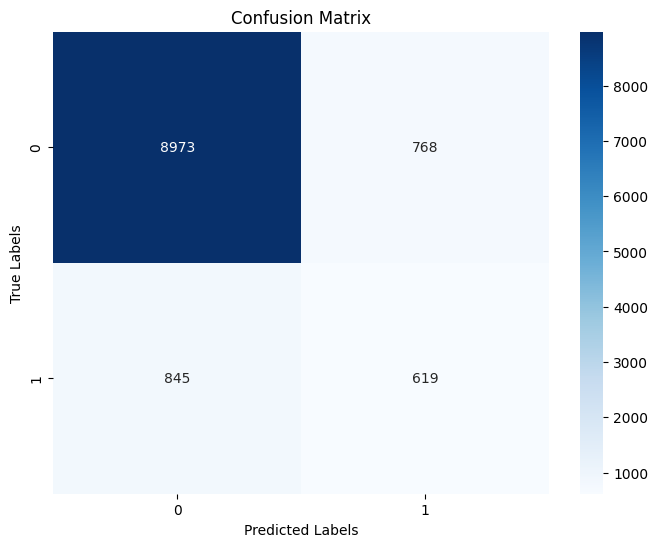

In [305]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

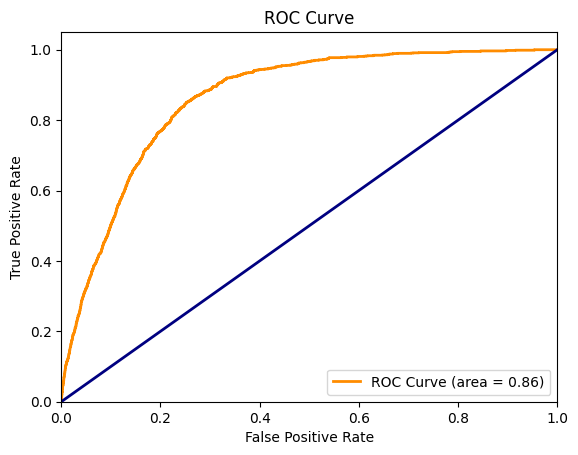

In [306]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [307]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9592
Number of Wrong Predictions: 1613


In [308]:
# Model Optimization for Logistic Regression Model

# Optimize Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


grid_log = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=5, scoring='roc_auc')
grid_log.fit(X_train, y_train)

best_log = grid_log.best_estimator_
y_pred_best_log = best_log.predict(X_test)
print("Best Parameters for Logistic Regression: ", grid_log.best_params_)

Best Parameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [309]:
# Evaluation function for Optimized Logistic Regression Model
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"Model: {model}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

evaluate_model(best_log, X_test, y_test, y_pred_best_log)

Model: LogisticRegression(C=0.1, random_state=42, solver='liblinear')
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      9741
           1       0.55      0.22      0.31      1464

    accuracy                           0.87     11205
   macro avg       0.72      0.60      0.62     11205
weighted avg       0.85      0.87      0.85     11205

Confusion Matrix:
[[9480  261]
 [1145  319]]
ROC AUC Score:
0.8677572558219637


In [310]:
# KNN Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn_model = KNeighborsClassifier()

# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('knn', knn_model)
]

# Creating a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

In [311]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.790450691655511
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.79      0.87      9741
           1       0.36      0.79      0.50      1464

    accuracy                           0.79     11205
   macro avg       0.66      0.79      0.68     11205
weighted avg       0.88      0.79      0.82     11205

Confusion Matrix:
[[7696 2045]
 [ 303 1161]]


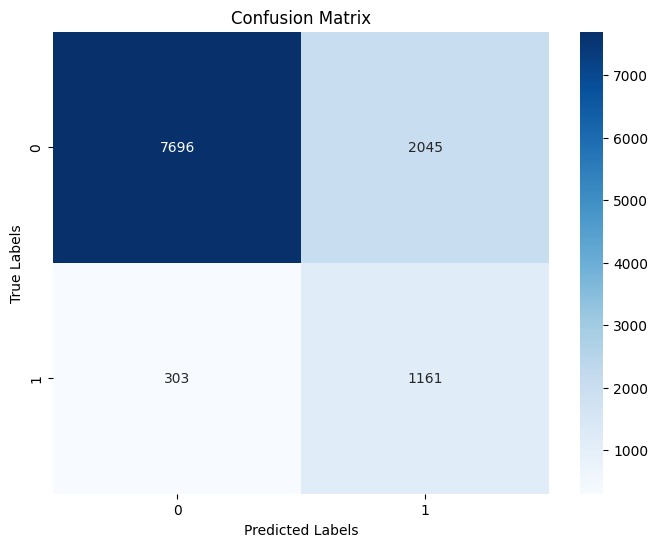

In [312]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

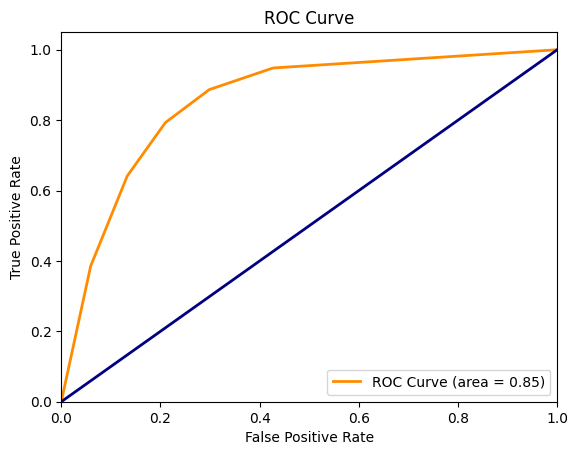

In [313]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [314]:
# Counting values correctly predicted by the KNN model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a KNN Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a KNN Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 8857
Number of Wrong Predictions: 2348


In [ ]:
# Model Optimization for KNN Model

# Parameters
param_grid_knn = {
    'n_neighbors': [5,10,15,20,25,30,50], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'kd_tree']
}

grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("Best Parameters for KNN Model: ", grid_knn.best_params_)

In [ ]:
# Evaluate the KNN model
evaluate_model(best_knn, X_test, y_test, y_pred_best_knn)

In [315]:
# Ensemble Learning
# Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Pipeline 
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('randomforest', rf_model) 
]

# Create a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

In [316]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8771976796073182
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93      9741
           1       0.53      0.59      0.56      1464

    accuracy                           0.88     11205
   macro avg       0.73      0.75      0.74     11205
weighted avg       0.88      0.88      0.88     11205

Confusion Matrix:
[[8969  772]
 [ 604  860]]


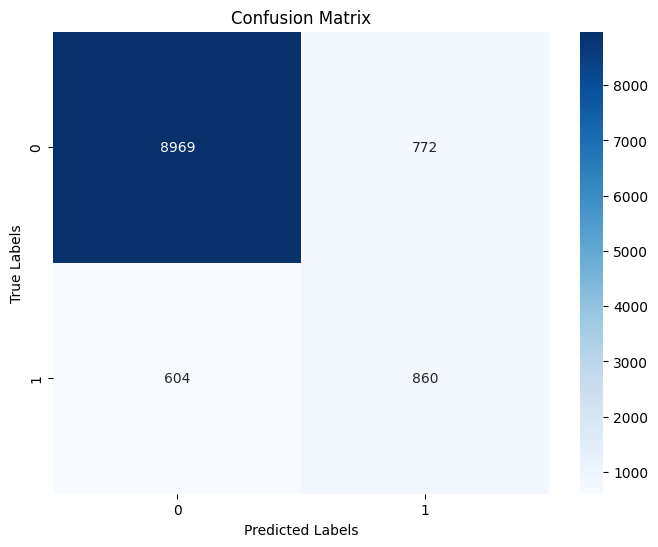

In [317]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

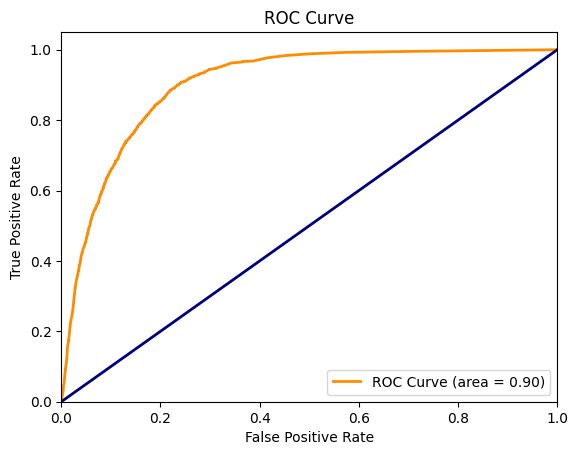

In [318]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [319]:
# Counting values correctly predicted by the Random Forest model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Random Forest Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Random Forest Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9829
Number of Wrong Predictions: 1376


In [322]:
# Optimizing Random Forest Model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [323]:
# Evaluate the Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)
evaluate_model(best_rf_model, X_test, y_test, y_pred_best_rf)

Model: RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9741
           1       0.79      0.17      0.28      1464

    accuracy                           0.89     11205
   macro avg       0.84      0.58      0.61     11205
weighted avg       0.88      0.89      0.85     11205

Confusion Matrix:
[[9675   66]
 [1211  253]]
ROC AUC Score:
0.9032526802097833


In [324]:
# AdaBoost Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),  # Focus on minority class
    ('adaboost', ada_model)  # Include your desired AdaBoost hyperparameters
]

# Create a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [325]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = ada_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8381972333779563
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.87      0.90      9741
           1       0.42      0.64      0.51      1464

    accuracy                           0.84     11205
   macro avg       0.68      0.76      0.71     11205
weighted avg       0.87      0.84      0.85     11205

Confusion Matrix:
[[8450 1291]
 [ 522  942]]


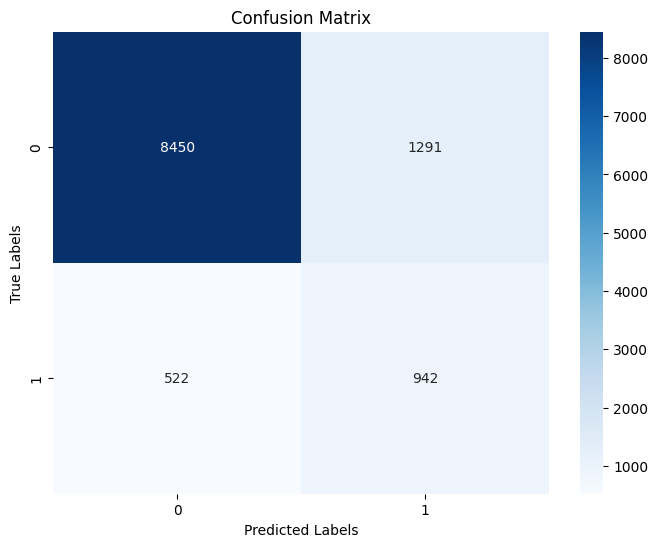

In [326]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

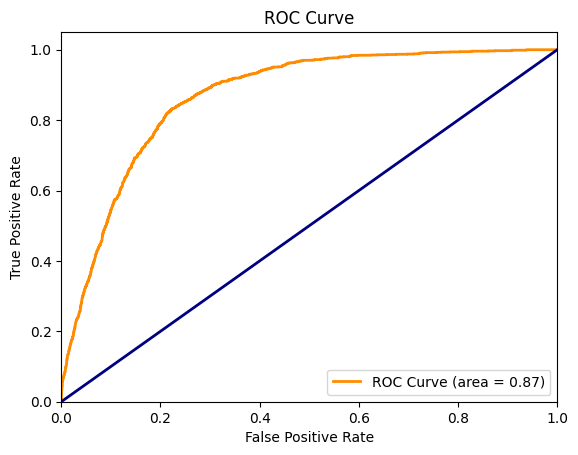

In [327]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [328]:
# Counting values correctly predicted by the Adaboost model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Adaboost Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Adaboost Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9392
Number of Wrong Predictions: 1813


In [329]:
# Optimize Adaboost Model

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_adaboost_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

{'learning_rate': 0.5, 'n_estimators': 200}


In [330]:
# Evaluate the Adaboost model
y_pred_best_ada = best_adaboost_model.predict(X_test)
evaluate_model(best_adaboost_model, X_test, y_test, y_pred_best_ada)

Model: AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9741
           1       0.63      0.29      0.40      1464

    accuracy                           0.88     11205
   macro avg       0.76      0.63      0.67     11205
weighted avg       0.87      0.88      0.87     11205

Confusion Matrix:
[[9485  256]
 [1033  431]]
ROC AUC Score:
0.8924641030560366
